In [8]:
import warnings
warnings.filterwarnings('ignore')
import os, shutil,gc
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import datetime
from functools import reduce

# Loading data

In [9]:
df=pd.read_csv(r'C:\Users\reya.sadhu\OneDrive - Fractal Analytics Pvt. Ltd\Documents\Capstone\Train.csv')

# EDA

In [10]:
df.head(10)

,Transaction_ID,Transaction_Date,Store_ID,Number_of_EMI,Purchased_in_Sale,Var1,Var2,Var3,Client_ID,Gender,DOB,Referred_Friend,Sales_Executive_ID,Sales_Executive_Category,Lead_Source_Category,Payment_Mode,Product_Category,Transaction_Amount
0,TRA98825550,1-Jan-03,STO1281,2,N,1,1,1,345821599,F,19-Aug-71,NO,SD23011859,B,Advertisment,Credit/Debit Card,Cat A,17455
1,TRA98825710,1-Jan-03,STO1247,2,N,1,2,1,345821734,M,3-Jul-76,NO,SD23000293,B,Advertisment,Credit/Debit Card,Cat A,16503
2,TRA98823874,1-Jan-03,STO1244,2,N,1,1,1,345820365,F,4-Jan-59,NO,SD23011768,B,Advertisment,Credit/Debit Card,Cat A,15012
3,TRA98823889,1-Jan-03,STO1256,2,N,1,1,1,345820377,M,11-May-60,NO,SD23011691,B,Advertisment,Credit/Debit Card,Cat A,16051
4,TRA98824521,1-Jan-03,STO1445,2,N,1,2,1,345820841,F,24-Mar-62,NO,SD23003031,B,Reference,Cheque,Cat A,15108
5,TRA98824747,1-Jan-03,STO1233,2,N,1,1,1,345821008,M,11-Sep-75,NO,SD23011684,B,Advertisment,Cash,Cat A,17292
6,TRA98826034,1-Jan-03,STO1314,2,N,1,2,1,345821979,F,9-May-66,NO,SD23021263,B,Advertisment,Credit/Debit Card,Cat A,16982
7,TRA98825775,1-Jan-03,STO1243,2,N,1,2,1,345821781,M,19-Dec-57,YES,SD23012337,B,Advertisment,Credit/Debit Card,Cat A,20093
8,TRA98823882,1-Jan-03,STO1250,2,N,1,2,1,345820371,M,8-Aug-62,NO,SD23011854,B,Advertisment,Credit/Debit Card,Cat A,15495
9,TRA98824721,1-Jan-03,STO1291,2,N,1,1,1,345820984,M,21-Jan-81,YES,SD23011738,B,Advertisment,Cheque,Cat A,16592


In [11]:
df.shape

(439541, 18)

In [12]:
df.dtypes

Transaction_ID              object
Transaction_Date            object
Store_ID                    object
Number_of_EMI                int64
Purchased_in_Sale           object
Var1                         int64
Var2                         int64
Var3                         int64
Client_ID                    int64
Gender                      object
DOB                         object
Referred_Friend             object
Sales_Executive_ID          object
Sales_Executive_Category    object
Lead_Source_Category        object
Payment_Mode                object
Product_Category            object
Transaction_Amount           int64
dtype: object

In [13]:
df.isnull().sum()

Transaction_ID                  0
Transaction_Date                0
Store_ID                        0
Number_of_EMI                   0
Purchased_in_Sale               0
Var1                            0
Var2                            0
Var3                            0
Client_ID                       0
Gender                          0
DOB                             0
Referred_Friend                 7
Sales_Executive_ID              0
Sales_Executive_Category        0
Lead_Source_Category            0
Payment_Mode                14513
Product_Category                0
Transaction_Amount              0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df['Client_ID'].duplicated().sum()

22434

In [16]:
df["no"]=df.groupby('Client_ID')['Client_ID'].transform('count')

In [17]:
df.head(10)

,Transaction_ID,Transaction_Date,Store_ID,Number_of_EMI,Purchased_in_Sale,Var1,Var2,Var3,Client_ID,Gender,DOB,Referred_Friend,Sales_Executive_ID,Sales_Executive_Category,Lead_Source_Category,Payment_Mode,Product_Category,Transaction_Amount,no
0,TRA98825550,1-Jan-03,STO1281,2,N,1,1,1,345821599,F,19-Aug-71,NO,SD23011859,B,Advertisment,Credit/Debit Card,Cat A,17455,1
1,TRA98825710,1-Jan-03,STO1247,2,N,1,2,1,345821734,M,3-Jul-76,NO,SD23000293,B,Advertisment,Credit/Debit Card,Cat A,16503,1
2,TRA98823874,1-Jan-03,STO1244,2,N,1,1,1,345820365,F,4-Jan-59,NO,SD23011768,B,Advertisment,Credit/Debit Card,Cat A,15012,1
3,TRA98823889,1-Jan-03,STO1256,2,N,1,1,1,345820377,M,11-May-60,NO,SD23011691,B,Advertisment,Credit/Debit Card,Cat A,16051,1
4,TRA98824521,1-Jan-03,STO1445,2,N,1,2,1,345820841,F,24-Mar-62,NO,SD23003031,B,Reference,Cheque,Cat A,15108,1
5,TRA98824747,1-Jan-03,STO1233,2,N,1,1,1,345821008,M,11-Sep-75,NO,SD23011684,B,Advertisment,Cash,Cat A,17292,1
6,TRA98826034,1-Jan-03,STO1314,2,N,1,2,1,345821979,F,9-May-66,NO,SD23021263,B,Advertisment,Credit/Debit Card,Cat A,16982,1
7,TRA98825775,1-Jan-03,STO1243,2,N,1,2,1,345821781,M,19-Dec-57,YES,SD23012337,B,Advertisment,Credit/Debit Card,Cat A,20093,1
8,TRA98823882,1-Jan-03,STO1250,2,N,1,2,1,345820371,M,8-Aug-62,NO,SD23011854,B,Advertisment,Credit/Debit Card,Cat A,15495,1
9,TRA98824721,1-Jan-03,STO1291,2,N,1,1,1,345820984,M,21-Jan-81,YES,SD23011738,B,Advertisment,Cheque,Cat A,16592,1


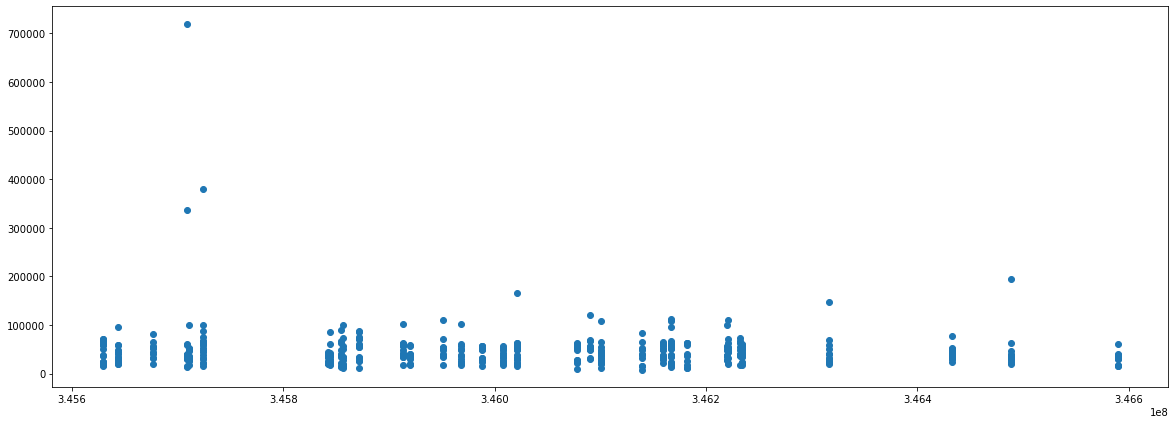

In [18]:
df["no"]=df.groupby('Client_ID')['Client_ID'].transform('count')
plt.figure(figsize=(20,7))
df1=df[df['no']>9]
plt.scatter(x=df1['Client_ID'],y=df1['Transaction_Amount'])

In [19]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Transaction_Date'].max()

Timestamp('2006-12-31 00:00:00')

In [20]:
df['Transaction_Date'].min()

Timestamp('2003-01-01 00:00:00')

The data holds transaction history from the first day of 2003 to the last day of 2006.

In [21]:
df['Referred_Friend'].value_counts()

NO     383739
YES     55795
Name: Referred_Friend, dtype: int64

In [22]:
df['Payment_Mode'].value_counts()

Credit/Debit Card    290041
Cheque                61433
Cash                  58480
Other                 15074
Name: Payment_Mode, dtype: int64

As there are very few values missing in Referred_friend column, we replace it with the mode of the column. But from the Payment mode, a large no of values are missing. So, instead of imputing it, we replace them with Unknown.

In [23]:
df['Referred_Friend'].fillna(df['Referred_Friend'].mode()[0],inplace=True)
df['Payment_Mode'].fillna('Unknown',inplace=True)

In [24]:
df['Number_of_EMI'].value_counts()

2    320392
3     86675
1     21248
8      8033
6      3193
Name: Number_of_EMI, dtype: int64

In [25]:
df['Purchased_in_Sale'].value_counts()

N    418293
Y     21248
Name: Purchased_in_Sale, dtype: int64

In [26]:
df['Gender'].value_counts()

M    322499
F    117039
          2
C         1
Name: Gender, dtype: int64

In [27]:
df['Gender']=np.where(df['Gender']==' ','M',df['Gender'])
df['Gender']=np.where(df['Gender']=='C','M',df['Gender'])

In [28]:
df['Sales_Executive_Category'].value_counts()

B    221641
A    178975
C     26633
E     10117
D      2175
Name: Sales_Executive_Category, dtype: int64

In [29]:
df['Lead_Source_Category'].value_counts()

Advertisment    241935
Walkin          170419
Reference        18154
Other             9033
Name: Lead_Source_Category, dtype: int64

In [30]:
df['Product_Category'].value_counts()

Cat B    227225
Cat A     84575
Cat D     52360
Cat C     44049
Cat H     26263
Cat F      4566
Cat G       472
Cat E        31
Name: Product_Category, dtype: int64

In [31]:
len(df['Store_ID'].unique())

298

We can consider it a important categorical feature and hot encode it.

In [32]:
len(df['Sales_Executive_ID'].unique())

36567

we cannot hot encode this column, because there will be 36567 more features.

# Feature Engineering

In [33]:
df['DOB'] = pd.to_datetime(df['DOB'].str[:-2] + '19' + df['DOB'].str[-2:])
df['Age']=(datetime.datetime(2007, 1, 1)-df['DOB'])/ np.timedelta64(1, 'D')

We compute the age as par 1st January,2007.

In [35]:
df['Age']=df['Age'].astype('int')
df['Age']=df['Age']/365

In [36]:
df['Transaction_Year']=pd.DatetimeIndex(df['Transaction_Date']).year
df['Transaction_Month']=df['Transaction_Date'].dt.strftime('%Y-%m')

In [37]:
df['Gender']=np.where(df['Gender']=='F',1,0)
df['Purchased_in_Sale']=np.where(df['Purchased_in_Sale']=='Y',1,0)

In [38]:
df['Sales_Executive_ID']=df['Sales_Executive_ID'].str[6:]
df['Sales_Executive_ID']=df['Sales_Executive_ID'].astype(int)

In [39]:
X_b1=df[df['Transaction_Year']<2006]
X_b2=df[df['Transaction_Year']<2005]
X_v1=df[df['Transaction_Year']==2006]
X_v2=df[df['Transaction_Year']==2005]
X_all=df

In [63]:
X_b1[X_b1['Client_ID']==345629580]

,Transaction_ID,Transaction_Date,Store_ID,Number_of_EMI,Purchased_in_Sale,Var1,Var2,Var3,Client_ID,Gender,...,Sales_Executive_ID,Sales_Executive_Category,Lead_Source_Category,Payment_Mode,Product_Category,Transaction_Amount,no,Age,Transaction_Year,Transaction_Month
21325,TRA98970508,2003-04-05,STO1392,2,0,1,1,1,345629580,0,...,3083,A,Walkin,Cash,Cat B,72000,19,38.035616,2003,2003-04
44450,TRA99159556,2003-07-14,STO1392,2,0,1,1,1,345629580,0,...,5095,A,Walkin,Cash,Cat B,22800,19,38.032877,2003,2003-07
69665,TRA99255687,2003-08-26,STO1392,6,0,3,1,1,345629580,0,...,3083,A,Walkin,Unknown,Cat A,15888,19,38.035616,2003,2003-08
69940,TRA99253427,2003-08-26,STO1392,6,0,3,1,1,345629580,0,...,3083,A,Walkin,Unknown,Cat B,22800,19,38.038356,2003,2003-08
69941,TRA99253860,2003-08-26,STO1392,6,0,3,1,1,345629580,0,...,3083,A,Walkin,Unknown,Cat B,19200,19,38.032877,2003,2003-08
69942,TRA99253916,2003-08-26,STO1392,2,0,1,1,1,345629580,0,...,3083,A,Walkin,Cash,Cat B,23400,19,38.038356,2003,2003-08
69943,TRA99251034,2003-08-26,STO1392,6,0,3,1,1,345629580,0,...,9140,A,Walkin,Unknown,Cat B,22200,19,38.032877,2003,2003-08
71174,TRA99252754,2003-08-26,STO1392,6,0,3,1,1,345629580,0,...,3083,A,Walkin,Unknown,Cat B,51136,19,38.032877,2003,2003-08
71175,TRA99253455,2003-08-26,STO1392,2,0,3,1,1,345629580,0,...,5095,A,Walkin,Cheque,Cat B,60724,19,38.038356,2003,2003-08
71838,TRA99256935,2003-08-27,STO1392,2,0,3,1,1,345629580,0,...,5095,A,Walkin,Credit/Debit Card,Cat B,18600,19,38.038356,2003,2003-08


In [71]:
temp=X_b1.groupby(['Client_ID','Transaction_Month']).size().reset_index()

In [72]:
temp[temp['Client_ID']==345629580]

,Client_ID,Transaction_Month,0
144,345629580,2003-04,1
145,345629580,2003-07,1
146,345629580,2003-08,16
147,345629580,2003-09,1


In [73]:
temp=temp.groupby(['Client_ID']).size().reset_index()

In [74]:
temp[temp['Client_ID']==345629580]

,Client_ID,0
118,345629580,4


In [80]:
t=X_b1.groupby(['Client_ID']).agg({"Transaction_Month":pd.Series.nunique}).reset_index()

In [81]:
t[t['Client_ID']==345629580]

,Client_ID,Transaction_Month
118,345629580,4


In [82]:
var1=(pd.crosstab(index=X_b1['Client_ID'], columns=[X_b1['Var1']])).reset_index()

In [83]:
var1

Var1,Client_ID,1,2,3
0,345612161,1,0,0
1,345612467,1,0,0
2,345612552,0,1,0
3,345612557,0,1,0
4,345612625,1,1,0
...,...,...,...,...
345969,346550814,1,0,0
345970,346550815,1,0,0
345971,346550818,1,0,0
345972,346550821,1,0,0


In [21]:
def transform(s,y):
    month=s.groupby(['Client_ID','Transaction_Month']).size().reset_index()
    count=month.groupby(['Client_ID']).size().reset_index()
    Age=s.groupby(['Client_ID']).agg({"Age":"mean"}).reset_index()
    Gender=s.groupby(['Client_ID']).agg({"Gender":"mean"}).reset_index()
    Sale=s.groupby(['Client_ID']).agg({"Purchased_in_Sale":"mean"}).reset_index()
    executive_id=s.groupby(['Client_ID']).agg({"Sales_Executive_ID":"median"}).reset_index()
    Source=(pd.crosstab(index=s['Client_ID'], columns=[s['Lead_Source_Category']])).reset_index()
    var1=(pd.crosstab(index=s['Client_ID'], columns=[s['Var1']])).reset_index()
    var2=(pd.crosstab(index=s['Client_ID'], columns=[s['Var2']])).reset_index()
    var3=(pd.crosstab(index=s['Client_ID'], columns=[s['Var3']])).reset_index()
    friend=(pd.crosstab(index=s['Client_ID'], columns=[s['Referred_Friend']])).reset_index()
    executive=(pd.crosstab(index=s['Client_ID'], columns=[s['Sales_Executive_Category']])).reset_index()
    payment=(pd.crosstab(index=s['Client_ID'], columns=[s['Payment_Mode']])).reset_index()
    store=(pd.crosstab(index=s['Client_ID'], columns=[s['Store_ID']])).reset_index()
    product=(pd.crosstab(index=s['Client_ID'], columns=[s['Product_Category']])).reset_index()
    date=s.groupby('Client_ID').agg({"Transaction_Date":"max"}).reset_index()
    if(y==2006):
        dt=np.datetime64("2006-01-01")
    elif(y==2007):
        dt=np.datetime64("2007-01-01")
    else:
        dt=np.datetime64("2005-01-01")
    date["Transaction_Date"]=(dt-date['Transaction_Date'])/np.timedelta64(1, 'D')
    final=reduce(lambda x,y: pd.merge(x,y, on='Client_ID', how='outer'), 
                 [count,Age,Gender,Sale,executive_id,Source,var1,var2,var3,friend,executive,payment,store,product,date])
    return final

Including transaction_amount in the feature engineering reduces the test auc score . I have tried with max, min, range, mean and median of transaction amount. Everything reduces the AUC score in the test set. So, for the final model, I have excluded them. May be a combination of central tendency would give a better score.

In [22]:
X_train_1=transform(X_b1,2006)
X_train_2=transform(X_b2,2005)
X_test=transform(X_all,2007)

Now, if a client is in X_v1, that means he made a purchase on 2006. So from X_train_1. which are the sets of clients who purchased before 2006, who are present in X_v1, are labelled 1, since they are repeating. Same for X_train_2 and X_v2.

In [23]:
a=set(X_v1['Client_ID'])
X_train_1['label']=np.where(X_train_1['Client_ID'].isin(a),1,0)
b=set(X_v2['Client_ID'])
X_train_2['label']=np.where(X_train_2['Client_ID'].isin(b),1,0)

In [106]:
X_train_1['label'].value_counts()

0    344424
1      1550
Name: label, dtype: int64

In [107]:
X_train_2['label'].value_counts()

0    246877
1      1903
Name: label, dtype: int64

We can see the data is highly imbalanced. So, our target will be improving the AUC score and not the accuracy.

In [24]:
target1=X_train_1['label']
X_train_1.drop(['label'],axis=1,inplace=True)
target2=X_train_2['label']
X_train_2.drop(['label'],axis=1,inplace=True)

We merge two training sets in 1 training set.

In [25]:
X_train=(pd.concat([X_train_1,X_train_2])).reset_index(drop=True)
y_train=np.concatenate((target1, target2))

The test data set can have some columns different than this merged training set due to presence of different categories in a feature. So from the test set, we drop the columns which are not in the training set and add which are in training set.


In [26]:
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col]=0
for col in X_test.columns:
    if col not in X_train.columns:
        X_test.drop([col],axis=1,inplace=True)

In [27]:
print(X_test.shape)
print(X_train.shape)
print(len(y_train))

(417107, 335)
(594754, 335)
594754


Since this outer join happens, some column will hold null value. We replace them with 0.

In [28]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

In [29]:
X_train.drop(['Client_ID'],axis=1,inplace=True)
test=X_test.drop(['Client_ID'],axis=1)

In [2]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
params={
   "objective":"binary:logistic", 
    "eta":0.02, 
    "max_depth":5,
    "subsample":0.6,
    "colsample_bytree":0.85,
    "eval_metric":"auc"
}
cv=xgb.cv(params=params, dtrain=dtrain, num_boost_round=1500, early_stopping_round=20, nfold=5, seed=41)
cv.tail(1)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
1139,0.915514,0.001355,0.885807,0.006925


So after 1140 rounds, the test auc mean starts to decrease. So, the model starts overfitting. So, for our final model, we run only for 1140 rounds.

In [3]:
model=XGBClassifier(objective="binary:logistic", 
    eta=0.02, 
    max_depth=5,
    n_estimators=1140,
    subsample=0.6,
    colsample_bytree=0.85, 
    eval_metric="auc")
model.fit(X_train,y_train)
probs=model.predict_proba(X_train)[:,1]
print('ROC AUC:', metrics.roc_auc_score(y_train, probs))

ROC AUC: 0.9133873787117477


In [92]:
ans=model.predict_proba(test)[:,1]
pred=pd.DataFrame(X_test['Client_ID'],columns=['Client_ID'])
pred['Cross_Sell']=ans

In [4]:
pred

,Client_ID,Cross_Sell
0,345612161,0.161187
1,345612467,0.001897
2,345612552,0.087501
3,345612557,0.028801
4,345612625,0.147585
...,...,...
417102,346663897,0.041935
417103,346663898,0.047131
417104,346663899,0.046873
417105,346663900,0.019929


In [94]:
pred.to_csv('Final.csv', index=False)